In [5]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [6]:
img = cv2.imread("./images/lena_noise_512.png", 0)

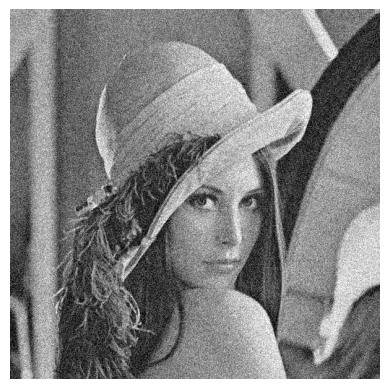

In [7]:
plt.axis("off")
plt.imshow(img, cmap='gray')
plt.show()

In [8]:
k = 3
mask = np.array([[1,2,1],[2,4,2],[1,2,1]], dtype='float16') 
mask = mask/16
print(mask)

[[0.0625 0.125  0.0625]
 [0.125  0.25   0.125 ]
 [0.0625 0.125  0.0625]]


In [9]:
bd = int(k/2)
print(bd)

1


In [10]:
f = img.copy().astype(np.float16)

In [11]:
out = np.zeros_like(img, dtype = 'float16')

In [12]:
(m,n) = img.shape
print(m,n,bd)

512 512 1


In [13]:
for i in range(bd,m-bd):
    for j in range(bd,n-bd):
        tmp = 0
        for p in range(k):
            for q in range(k):
                tmp = tmp + (mask[p,q]*f[i+p-bd,j+q-bd])
        out[i,j] = tmp    

In [14]:
out = out.astype(np.uint8)

In [15]:
imgs = cv2.hconcat([img, out])

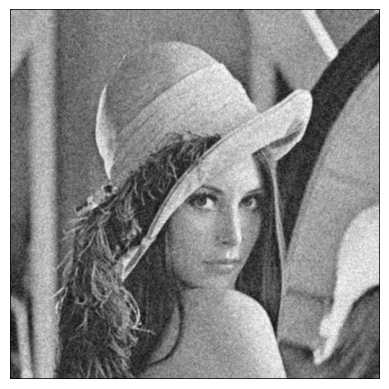

In [17]:
plt.axis("off")
plt.imshow(out, cmap='gray')
plt.show()